# **Partie 1**
Dans cette partie nous allons procéder à la création des features afin de connaitre la santé économique des 9 pays choisis.
À travers ce fichier voici les colonnes qui serviront à calculer:
Country, year, inflationrate, gdppercent, percapitaincome,  umploymenrate, USTreasury
Parmi les calculs: 
# 1-inflationrate vs la moyenne d'inflation des 9 pays
# 2-unemploymentrate vs la moyenne du taux de chommage des 9 pays
# 3-dppercent l'évolution pour chaque annee vs la moyenne des 9 pays par decennie
# 4-percapitaincome calculer l'évolution et comparer avec les autres pays
# 5- voir les pays qui ont enregistrés des bonnes et les mauvases économies durant la période de 40 ans


https://www.kaggle.com/datasets/pratik453609/economic-data-9-countries-19802020




# **Importation du fichier**

In [ ]:
#import sys
#import io
#if 'google.colab' in sys.modules:
  #from google.colab import files
  #data = files.upload()

# **Importation des librairies**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

In [ ]:
#lecture du fichier et transformation en dataframe
df = pd.read_csv('Economic_Data_9_Countries(1980-2020).csv')
df.head(100)

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.00,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.00,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.00,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.00,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.00,0.11,17121.0,0.08,NaN,-102.73,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Nifty 50,India,1993.0,3346.06,3.52,0.06,14.52,31.29,0.05,301.0,0.06,44.45,0.05,0.06
96,Nifty 50,India,1994.0,3926.90,3.59,0.10,17.16,31.39,0.07,346.0,0.06,54.86,-0.99,0.07
97,Nifty 50,India,1995.0,3110.49,3.49,0.10,19.03,32.42,0.08,374.0,0.06,64.37,-4.25,0.07
98,Nifty 50,India,1996.0,3085.20,3.49,0.09,25.23,35.51,0.08,400.0,0.06,69.14,-4.55,0.06


In [ ]:
#Definir un unique id
df['unique_id'] = df.percapitaincome.astype(str) + '_' + df.USTreasury.astype(str)

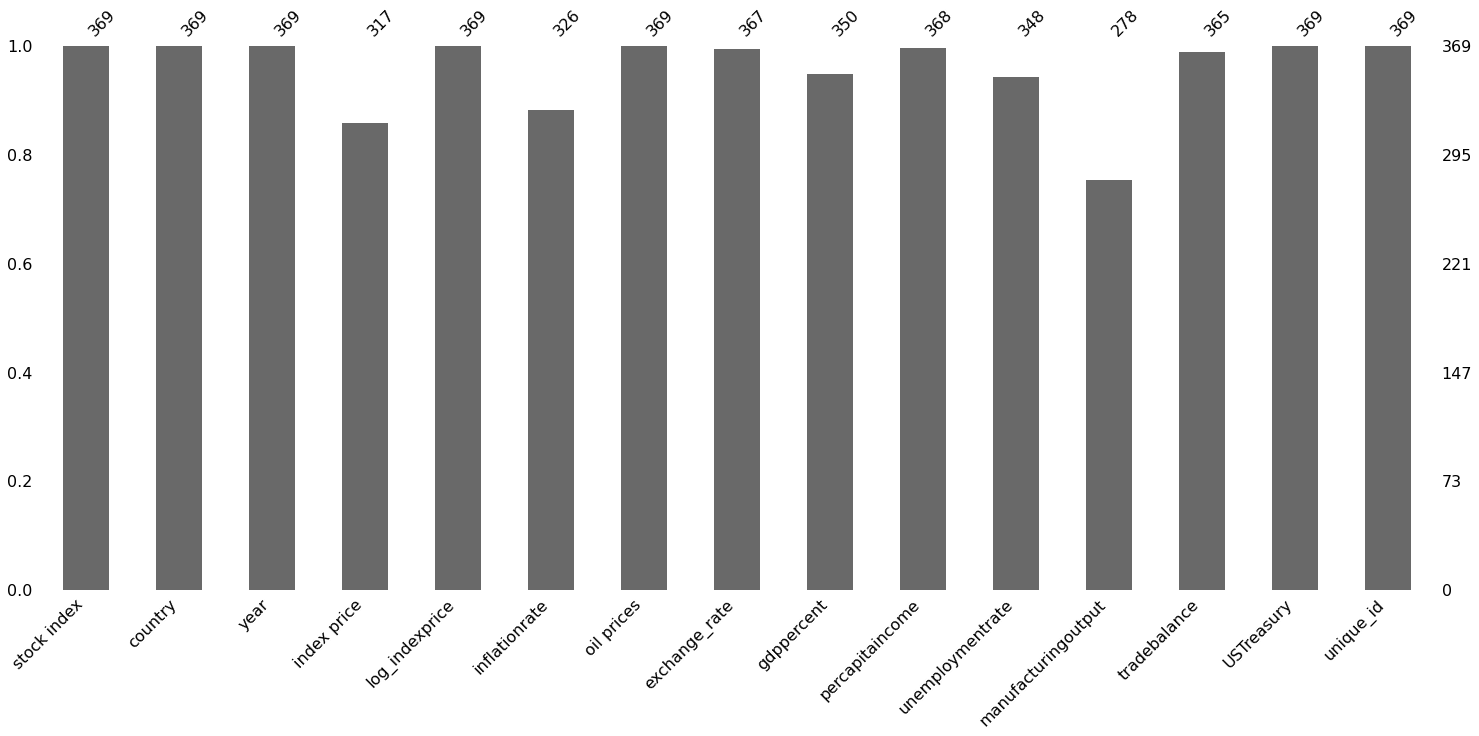

In [ ]:
#Affiche les colonnes avec le nombre de valeurs a l 'interieur
msno.bar(df)

In [ ]:
#Affiche les informations des colonnes(nom de colonne,nb de lignes remplie,type de colonnes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
 14  unique_id            369 non-null    object 
dtypes: float64(12), object(3)
memory usage: 

In [ ]:
#Afficher le nombre de vide dans une colonne
df.isnull().sum()

stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
unique_id               0
dtype: int64

In [ ]:
#Afficher le nom des colonnes
df.columns

Index(['stock index', 'country', 'year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury', 'unique_id'],
      dtype='object')

In [ ]:
#définition des features à étudier
features = df[['unique_id','country','year','inflationrate','gdppercent','percapitaincome','unemploymentrate']].copy()

In [ ]:
features['inflationrate'].fillna(features['inflationrate'].mean(),inplace=True)
features['gdppercent'].fillna(features['gdppercent'].mean(),inplace=True)
features['unemploymentrate'].fillna(features['unemploymentrate'].mean(),inplace=True)

In [ ]:
# mettre de cotés les autres colonnes pour la prochaine étape
y=df[['unique_id','oil prices','stock index','index price','exchange_rate']].copy()

In [ ]:
#voir les détails 
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unique_id         369 non-null    object 
 1   country           369 non-null    object 
 2   year              369 non-null    float64
 3   inflationrate     369 non-null    float64
 4   gdppercent        369 non-null    float64
 5   percapitaincome   368 non-null    float64
 6   unemploymentrate  369 non-null    float64
dtypes: float64(5), object(2)
memory usage: 20.3+ KB


In [ ]:
#voir une vue global de nos features
features.describe

<bound method NDFrame.describe of         unique_id                   country    year  inflationrate  \
0    12575.0_0.11  United States of America  1980.0       0.140000   
1    13976.0_0.14  United States of America  1981.0       0.100000   
2    14434.0_0.13  United States of America  1982.0       0.060000   
3    15544.0_0.11  United States of America  1983.0       0.030000   
4    17121.0_0.12  United States of America  1984.0       0.040000   
..            ...                       ...     ...            ...   
364  26523.0_0.02                     Spain  2016.0       0.041748   
365  28170.0_0.02                     Spain  2017.0       0.020000   
366  30389.0_0.03                     Spain  2018.0       0.020000   
367  29565.0_0.02                     Spain  2019.0       0.010000   
368  27057.0_0.01                     Spain  2020.0       0.041748   

     gdppercent  percapitaincome  unemploymentrate  
0          0.09          12575.0              0.07  
1          0.12    

In [ ]:
#calcule de la moyenne des inflationrate des 9 countries
avg_infla= features['inflationrate'].groupby(features['year']).mean().reset_index(name='MoyInflation')
features= pd.merge(features,avg_infla,how='left',on=['year'])
features.head(10)

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083
5,18237.0_0.11,United States of America,1985.0,0.04,0.07,18237.0,0.07,0.047972
6,19071.0_0.08,United States of America,1986.0,0.02,0.06,19071.0,0.07,0.042611
7,20039.0_0.08,United States of America,1987.0,0.04,0.06,20039.0,0.06,0.051500
8,21417.0_0.09,United States of America,1988.0,0.04,0.08,21417.0,0.05,0.060000
9,22857.0_0.08,United States of America,1989.0,0.05,0.08,22857.0,0.05,0.067778


In [ ]:
#calcule de la moyenne des unemploymentrate des 9 countries
avg_empl = features['unemploymentrate'].groupby(features['year']).mean().reset_index(name='Moyemployment')
features = pd.merge(features,avg_empl,how='left',on=['year'])


In [ ]:
#calcule de la moyenne des gdppercent des 9 countries
avg_gdp = features['gdppercent'].groupby(features['year']).mean().reset_index(name='MoyGdpPercent')
features = pd.merge(features,avg_gdp,how='left',on=['year'])

In [ ]:
#Calculer la difference entre inflationrate et MoyInflation
inflation = features[['unique_id','inflationrate','MoyInflation']].copy()
inflation['diffinflatrate']=inflation['inflationrate']-inflation['MoyInflation']
inflation1= inflation[['unique_id','diffinflatrate']].copy()
features=pd.merge(features,inflation1,how='left',on=['unique_id'])

In [ ]:
#Calculer la difference entre unemploymentrate et Moyemployment
chommage = features[['unique_id','unemploymentrate','Moyemployment']].copy()
chommage['diffuneployrate']=chommage['unemploymentrate']-chommage['Moyemployment']
chommage1= chommage[['unique_id','diffuneployrate']].copy()
features=pd.merge(features,chommage1,how='left',on=['unique_id'])

In [ ]:
#Calculer la difference entre gdppercent et MoyGdpPercent
gdp = features[['unique_id','gdppercent','MoyGdpPercent']].copy()
gdp['diffgdppercent']=gdp['gdppercent']-gdp['MoyGdpPercent'].copy()
gdp1= gdp[['unique_id','diffgdppercent']].copy()
features=pd.merge(features,gdp1,how='left',on=['unique_id'])

In [ ]:
# trouver les meilleurs et les mauvais pays sur l'inflation
#on considere bonne posture en inflation si diffinflatrate est < 0 et en mauvaise posture si diffinflatrate est >0
features.loc[features['diffinflatrate']>0,'situation_inflation']=0
features.loc[features['diffinflatrate']<0,'situation_inflation']=1

In [ ]:
features.head(50)

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,diffinflatrate,diffuneployrate,diffgdppercent,situation_inflation
0,12575.0_0.11,United States of America,1980.0,0.140000,0.090000,12575.0,0.07,0.104833,0.050747,0.044444,0.035167,0.019253,0.045556,0.0
1,13976.0_0.14,United States of America,1981.0,0.100000,0.120000,13976.0,0.08,0.091500,0.052969,0.045235,0.008500,0.027031,0.074765,0.0
2,14434.0_0.13,United States of America,1982.0,0.060000,0.040000,14434.0,0.10,0.080194,0.057414,0.035235,-0.020194,0.042586,0.004765,1.0
3,15544.0_0.11,United States of America,1983.0,0.030000,0.090000,15544.0,0.10,0.066861,0.060868,0.051111,-0.036861,0.039132,0.038889,1.0
4,17121.0_0.12,United States of America,1984.0,0.040000,0.110000,17121.0,0.08,0.059083,0.058646,0.060000,-0.019083,0.021354,0.050000,1.0
5,18237.0_0.11,United States of America,1985.0,0.040000,0.070000,18237.0,0.07,0.047972,0.057535,0.045556,-0.007972,0.012465,0.024444,1.0
6,19071.0_0.08,United States of America,1986.0,0.020000,0.060000,19071.0,0.07,0.042611,0.057535,0.048889,-0.022611,0.012465,0.011111,1.0
7,20039.0_0.08,United States of America,1987.0,0.040000,0.060000,20039.0,0.06,0.051500,0.072101,0.061111,-0.011500,-0.012101,-0.001111,1.0
8,21417.0_0.09,United States of America,1988.0,0.040000,0.080000,21417.0,0.05,0.060000,0.068768,0.072222,-0.020000,-0.018768,0.007778,1.0
9,22857.0_0.08,United States of America,1989.0,0.050000,0.080000,22857.0,0.05,0.067778,0.064323,0.045556,-0.017778,-0.014323,0.034444,1.0


In [ ]:
# trouver les meilleurs et les mauvais pays sur le chomage
#on considere bonne posture en chomage si diffunemploymentrate est < 0 et en mauvaise posture si diffinflatrate est >0
features.loc[features['diffuneployrate']>0,'situation_chommage']=0
features.loc[features['diffuneployrate']<0,'situation_chommage']=1

In [ ]:
# trouver les meilleurs et les mauvais pays sur le gdp
#on considere bonne posture en chomage si diffgdppercent est < 0 et en mauvaise posture si diffinflatrate est >0
features.loc[features['diffgdppercent']<0,'situation_gdp']=0
features.loc[features['diffgdppercent']>0,'situation_gdp']=1

In [ ]:
features.head()

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,diffinflatrate,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,0.035167,0.019253,0.045556,0.0,0.0,1.0
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,0.008500,0.027031,0.074765,0.0,0.0,1.0
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,-0.020194,0.042586,0.004765,1.0,0.0,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,-0.036861,0.039132,0.038889,1.0,0.0,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,-0.019083,0.021354,0.050000,1.0,0.0,1.0


In [ ]:
features.columns

Index(['unique_id', 'country', 'year', 'inflationrate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'MoyInflation', 'Moyemployment',
       'MoyGdpPercent', 'diffinflatrate', 'diffuneployrate', 'diffgdppercent',
       'situation_inflation', 'situation_chommage', 'situation_gdp'],
      dtype='object')

In [ ]:
# trouver les bonnes et les mauvaises économies des 9 pays
#on considere bonne économie si situation_inflation est égale à 1 &  situation_gdp est égale à 1
#OU situation_inflation est égale à 1 & situation_chommage est est égale à 1
#ou situation_gdp est égale à 1 & situation_chommage est est égale à 1
#l'inverse est erifié pou rles mauvaises économies
df_temp_1 = features[['unique_id','situation_inflation','situation_chommage','situation_gdp']].copy()
df_temp_1 = df_temp_1[(((df_temp_1.situation_inflation == 1) & (df_temp_1.situation_gdp == 1)) | ((df_temp_1.situation_inflation == 1) & (df_temp_1.situation_chommage == 1)) | ((df_temp_1.situation_gdp == 1) & (df_temp_1.situation_chommage == 1)))]
df_temp_2 = df_temp_1[['unique_id']].copy()
df_temp_2['bonne_economie']= df_temp_2['unique_id'].map(df_temp_2['unique_id'].value_counts()) 
df_temp_2 = df_temp_2.drop_duplicates(['unique_id'],keep="first")
features= pd.merge(features,df_temp_2, how='left', on=['unique_id'])

In [ ]:
features.head(-60)

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,diffinflatrate,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,0.035167,0.019253,0.045556,0.0,0.0,1.0,NaN
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,0.008500,0.027031,0.074765,0.0,0.0,1.0,NaN
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,-0.020194,0.042586,0.004765,1.0,0.0,1.0,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,-0.036861,0.039132,0.038889,1.0,0.0,1.0,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,-0.019083,0.021354,0.050000,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,3694.0_0.06,France,1997.0,0.01,0.02,3694.0,0.12,0.030000,0.075556,0.040000,-0.020000,0.044444,-0.020000,1.0,0.0,0.0,NaN
305,3807.0_0.05,France,1998.0,0.01,0.04,3807.0,0.12,0.026667,0.075556,0.028889,-0.016667,0.044444,0.011111,1.0,0.0,1.0,1.0
306,24682.0_0.06,France,1999.0,0.01,0.03,24682.0,0.11,0.013528,0.073333,0.045235,-0.003528,0.036667,-0.015235,1.0,0.0,0.0,NaN
307,22420.0_0.06,France,2000.0,0.02,0.04,22420.0,0.10,0.014639,0.067778,0.047778,0.005361,0.032222,-0.007778,0.0,0.0,0.0,NaN


In [ ]:
#ajouter le reste des features au fichier final
features = pd.merge(features,y,how="left",on = 'unique_id')

In [ ]:
features.head(5)

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,...,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie,oil prices,stock index,index price,exchange_rate
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,...,0.019253,0.045556,0.0,0.0,1.0,NaN,21.59,NASDAQ,168.61,1.0
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,...,0.027031,0.074765,0.0,0.0,1.0,NaN,31.77,NASDAQ,203.15,1.0
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,...,0.042586,0.004765,1.0,0.0,1.0,1.0,28.52,NASDAQ,188.98,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,...,0.039132,0.038889,1.0,0.0,1.0,1.0,26.19,NASDAQ,285.43,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,...,0.021354,0.050000,1.0,0.0,1.0,1.0,25.88,NASDAQ,248.89,1.0


In [ ]:
#sauvgarder l'ensemble des données dans un fichier csv pour l'utilisation dans la prochaine étape
features.to_csv("features.csv",index=False)